This notebook contains plots of various statistical and systems metrics gathered from the last run

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import visualization_utils

In [6]:
SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
PLOT_CLIENTS = False
stat_file = 'metrics_stat.csv' # change to None if desired
sys_file = 'metrics_sys.csv' # change to None if desired

stat_metrics, sys_metrics = visualization_utils.load_data(stat_file, sys_file)

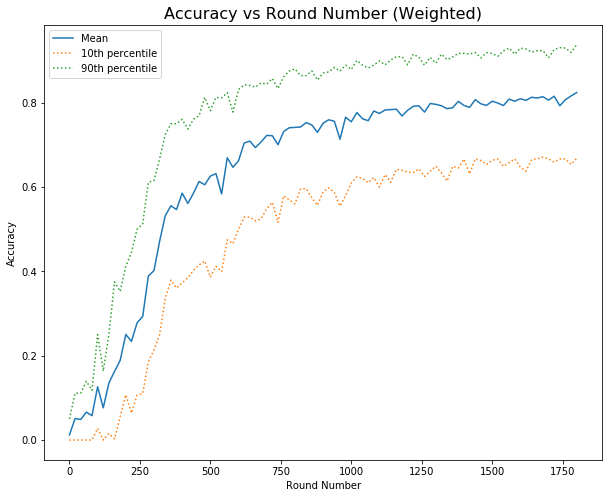

In [7]:
# Plots accuracy vs. round number.
if stat_metrics is not None:
    visualization_utils.plot_accuracy_vs_round_number(stat_metrics, True, plot_stds=False)

In [5]:
if PLOT_CLIENTS and stat_metrics is not None:
    visualization_utils.plot_accuracy_vs_round_number_per_client(stat_metrics, sys_metrics, max_num_clients=20)

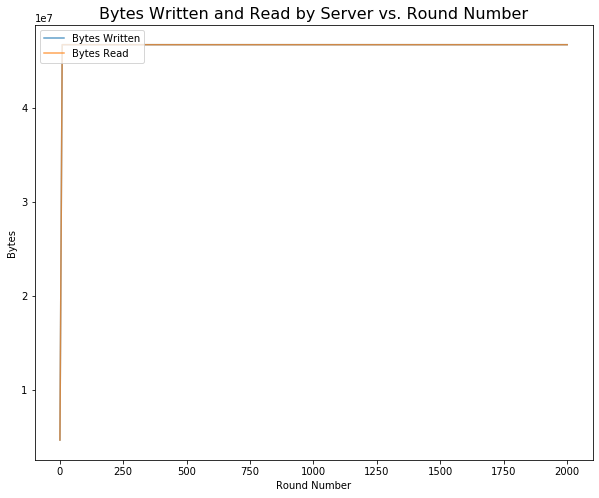

In [6]:
# Plots the cumulative sum of the bytes written and read by the server in 
# the past rolling_window rounds versus the round number

if stat_metrics is not None:
    visualization_utils.plot_bytes_written_and_read(sys_metrics, rolling_window=10)

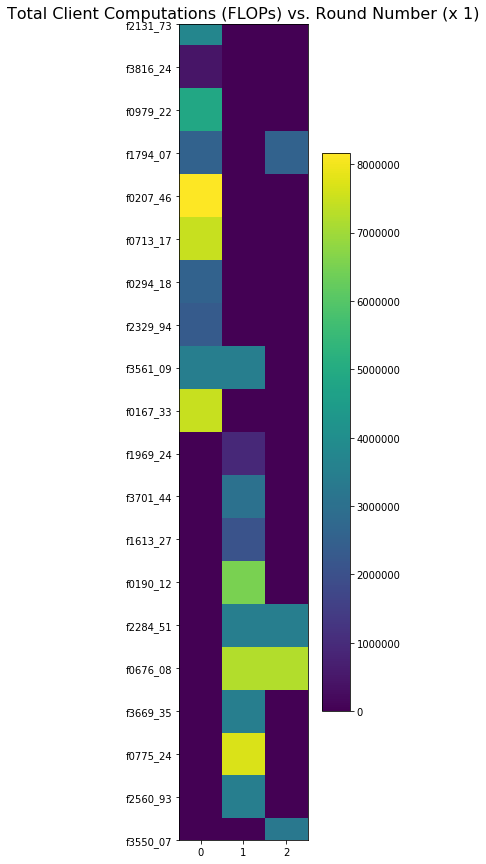

In [7]:
visualization_utils.plot_client_computations_vs_round_number(sys_metrics, aggregate_window=1, max_num_clients=20, range_rounds=(1, 4))

In [7]:
print('Longest FLOPs path: %s' % visualization_utils.get_longest_flops_path(sys_metrics))

Longest FLOPs path: 1.76E+11


In [4]:
stat_metrics[['round_number', 'num_samples', 'accuracy']]
nf = stat_metrics[stat_metrics['round_number']==2000].copy()
nf['weighted_acc'] = nf['num_samples'] * nf['accuracy']
print("Final Accuracy: {}".format(nf['weighted_acc'].sum() / nf['num_samples'].sum()))

Final Accuracy: 0.8227823557718785


0.81483620271456958